# MNIST 손글씨 데이터 인식하기

In [0]:
from google.colab import auth
auth.authenticate_user()

from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 131323 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.1-0ubuntu3~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.1-0ubuntu3~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.1-0ubuntu3~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=ht

**데이터 불러오기**

- 학습 데이터 = 레이블이 붙어 있는 60000개의 데이터
(레이블 = 입력 값과 함께 결과 값(정답)이 들어 있다는 의미)
- 테스트 데이터 = 10000개


---

- 레코드 = 데이터의 각 행
- 레이블 = 첫번째 값 (ex. 5,0,4,1,9 등 그 이미지에 있는 숫자의 값을 나타냄 =  정답)

- 레이블 이후 나오는 쉼표로 구분되는 값 = 손으로 쓴 숫지의 픽셀 값 (픽셀 배열의 크기 28 x 28이므로 총 784개의 값)


In [0]:
data_file = open("./gdrive/My Drive/Deep Learning Study/신경망 첫걸음/Practice `19.03.22 - 2/Data/mnist_train_100.csv", 'r')
data_list = data_file.readlines()
data_file.close()

In [0]:
len(data_list)

100

In [0]:
data_list[0] # 첫번째 레코드 내용! -> 이미지의 레이블 = 5 /  나머지 784 숫자들은 이미지를 구성하는 픽셀들의 색상 값

# 모든 색상 값은 0 ~ 255 사이 숫자

'5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,1,154,253,90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,139,253,190,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,190,253,70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35,241,225,160,108,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,81,240,253,253,119,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

**행렬 시각화하는 방법**


- 1단계 : 구분자로 쉼표를 이용해 긴 텍스트 문자열을 개별 값으로 분리합니다.
- 2단계 : 레이블 값인 첫번째 값은 무시하고 나머지 28 x 28 = 784의 값을 추출한 후, 이를 28개 행과 28개 열의 형태를 가지는 배열로 변환해줍니다.
- 3단계 : 이 배열을 시각화합니다.

In [0]:
import numpy
import matplotlib.pyplot
%matplotlib inline

In [0]:
all_values = data_list[0].split(',')
len(all_values) # 레이블을 포함한 총 레코드의 길이

785

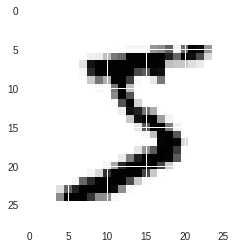

In [0]:
image_array = numpy.asfarray(all_values[1:]).reshape((28, 28))
matplotlib.pyplot.imshow(image_array, cmap='Greys', interpolation='None')

- numpy.asfarray : 문자열을 실수로 변환한 다음 그 숫자로 구성된 배열을 생성 (즉, 문자열을 숫자로 변환)
- all_values[1:] : 레이블 제외하고 나머지 값만 가지고오기!
- ~~.reshape((28, 28) : 28 x 28 형태의 정방 행렬로 만들기


*matplotlib.pyplot.imshow를 통해 시각화*
- cmap= 색상 지정

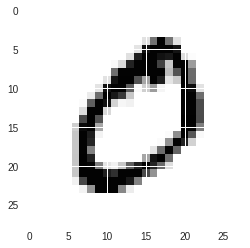

In [0]:
all_values = data_list[1].split(',')
image_array = numpy.asfarray(all_values[1:]).reshape((28, 28))
matplotlib.pyplot.imshow(image_array, cmap='Greys', interpolation='None')

## MNIST 학습 데이터 준비하기

신경망 적용 전 확인할 점

1) 입력 색상 값 범위조정 (0.01 ~1.0)

- 입력 데이터와 출력 데이터 값들이 적절한 형태를 가져서 활성화 함수의 수용 범위에 있는가 
- 하한선 0.01 : 입력 값이 0을 가지면 가중치 업데이트를 없애버리므로
- 상한선 1.0 ( cf. 출력 값에 대해서는 1.0을 회피해야함)

2) 255로 나누기

: 0~ 255 사이의 값을 가지는 입력 값들을 max(입력값)로 나누면 0 ~ 1범위를 가지게 됨

3) 이에 0.99를 곱하면 범위가 0.0 ~ 0.99가 됨

4) 여기에 0.01을 더함으로써 워하는 값의 범위 (0.01 ~ 1.0)을 얻을 수 있음

In [0]:
scaled_input = (numpy.asfarray(all_values[1:])/255.0*0.99) + 0.01
print(scaled_input)

[0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0

**결과 값**

- 레이블 = 0~9 까지 10개의 숫자 중 하나
- 출력 계층 = 총 10개의 노드로 구성되어야!!
각 노드는 가능한 결과 값, 즉 각 레이블에 해당

---
![대체 텍스트](https://user-images.githubusercontent.com/34272301/54819459-49bc3580-4cdf-11e9-8cad-d7b33427e0b8.png)

---

==> 색칠된 값은 출력 계층의 레이블이 선택될 확률

특히, 9에 대한 결과를 유의할 것

In [0]:
# 결과 노드 예시
onodes = 10
targets = numpy.zeros(onodes) + 0.01
targets[int(all_values[0])] = 99

print(targets)

[9.9e+01 1.0e-02 1.0e-02 1.0e-02 1.0e-02 1.0e-02 1.0e-02 1.0e-02 1.0e-02
 1.0e-02]


---
### 3 계층의 신경망으로 MNIST 데이터를 학습하는 코드

In [0]:
import numpy 
import scipy.special # 시그모이드 함수 expit 사용을 위해 scipy.special 불러오기
import matplotlib.pyplot # 행렬을 시각화하기 위한 라이브러리
%matplotlib inline 
# 시각화가 외부 윈도우가 아닌 현재의 노트북 내에서 보이도록 설정

# 신경망 클래스의 정의 
class neuralNetwork:
  
  # 신경망 초기화하기
  def __init__(self,inputnodes,hiddennodes, outputnodes, learningrate):
    # 입력, 은닉, 출력 계층의 노드 갯수 설정
    self.inodes = inputnodes
    self.hnodes = hiddennodes
    self.onodes = outputnodes
    
    # 가중치 행렬 W_ih와 W_ho
  
    # 배열 내 가중치는 W_i_j로 표기. 노드 i에서 다음 계층의 노드 j로 연결됨을 의미
    # w11 w21
    # w12 w22 등    
    self.wih = numpy.random.normal(0.0,pow(self.hnodes,-0.5),(self.hnodes,self.inodes))
    self.who = numpy.random.normal(0.0,pow(self.onodes,-0.5),(self.onodes,self.hnodes))

    # 학습률
    self.lr = learningrate

    # 활성화 함수로는 시그모이드 함수를 이용
    self.activation_function = lambda x: scipy.special.expit(x)

    pass
  
  # 신경망 학습시키기
  def train(self,inputs_list,targets_list):

    # 입력 리스트를 2차원의 행렬로 변환
    inputs = numpy.array(inputs_list,ndmin=2).T
    targets = numpy.array(targets_list,ndmin=2).T

    # 은닉 계층으로 들어오는 신호를 계산
    hidden_inputs = numpy.dot(self.wih,inputs)
    # 은닉 계층에서 나가는 신호를 계산
    hidden_outputs = self.activation_function(hidden_inputs)


    # 최종 출력 계층으로 들어오는 신호를 계산
    final_inputs = numpy.dot(self.who, hidden_outputs)
    # 최종 출력 계층에서 나가는 신호를 계산
    final_outputs = self.activation_function(final_inputs)
    
    # 출력 계층의 오차는 (실제 값 - 계산 값)
    output_errors = targets - final_outputs
    # 은닉 계층의 오차는 가중치에 의해 나뉜 출력 계층의 오차들을 재조합해 계산
    hidden_errors = numpy.dot(self.who.T,output_errors)

    # 은닉 계층과 출력 계층 간의 가중치 업데이트
    self.who += self.lr * numpy.dot((output_errors * final_outputs * 
                                 (1.0 - final_outputs)),numpy.transpose(hidden_outputs))

    # 입력 계층과 은닉 계층 간의 가중치 업데이트
    self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs *
                                 (1.0 -hidden_outputs)), numpy.transpose(inputs))
  
    pass
  
  # 신경망에 질의하기
  def query(self, inputs_list):
    # 입력리스트를 2차원 행렬로 변환
    inputs = numpy.array(inputs_list,ndmin = 2).T
    
    # 은닉 계층으로 들어오는 신호를 계산
    hidden_inputs = numpy.dot(self.wih,inputs)
    # 은닉 계층에서 나가는 신호를 계산
    hidden_outputs = self.activation_function(hidden_inputs)

    # 최종 출력 계층으로 들어오는 신호를 계산
    final_inputs = numpy.dot(self.who, hidden_outputs)
    # 최종 출력 계층에서 나가는 신호를 계산
    final_outputs = self.activation_function(final_inputs)
    
    return final_outputs

# 입력, 은닉, 출력 노드의 수
input_nodes = 784
hidden_nodes = 100
output_nodes = 10

# 학습률은 0.3
learning_rate = 0.3

# 신경망의 인스턴스 생성
n = neuralNetwork(input_nodes,hidden_nodes,output_nodes,learning_rate)

# mnist 학습 데이터인 CSV 파일을 리스트로 불러오기
training_data_file = open("./gdrive/My Drive/Deep Learning Study/신경망 첫걸음/Practice `19.03.22 - 2/Data/mnist_train_100.csv", 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

# 신경망 학습시키기

# 학습 데이터 모음 내의 모든 레코드 탐색
for record in training_data_list:
  # 레코드를 쉼표에 의해서 분리
  all_values = record.split(',')
  # 입력값의 범위와 값 조정
  inputs = (numpy.asfarray(all_values[1:])/255.0*0.99) + 0.01
  # 결과 값 생성 (실제 값인 0.99 외에는 모두 0.01)
  targets = numpy.zeros(output_nodes) + 0.01
  # all_values[0]은 이 레코드에 대한 결과 값
  targets[int(all_values[0])] = 0.99
  n.train(inputs,targets)
  pass

## 신경망 테스트 하기

In [0]:
# mnist 테스트 데이터인 csv 파일을 리스트로 불러오기
test_data_file = open("./gdrive/My Drive/Deep Learning Study/신경망 첫걸음/Practice `19.03.22 - 2/Data/mnist_test_10.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

In [0]:
# 첫번째 테스트 레코드 확인
all_values = test_data_list[0].split(',')
# 레이블 확인
print(all_values[0])

7


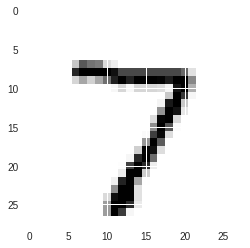

In [0]:
image_array = numpy.asfarray(all_values[1:]).reshape((28,28))
matplotlib.pyplot.imshow(image_array,cmap = 'Greys',interpolation='None')

In [0]:
n.query((numpy.asfarray(all_values[1:])/255.0*0.99)+0.01)

array([[0.02786925],
       [0.00707122],
       [0.02197507],
       [0.06132891],
       [0.01930226],
       [0.07065796],
       [0.00702743],
       [0.78554201],
       [0.05835321],
       [0.03684337]])

In [0]:
# 신경망 테스트

# 신경망의 성능의 지표가 되는 성적표를 아무 값도 가지지 않도록 초기화
scorecard = []

# 테스트 데이터 모음 내의 모든 레코드 탐색
for record in test_data_list:
  
  # 레코드를 쉼표에 이해 분리
  all_values = record.split(',')

  # 정답은 첫번쨰 값
  correct_label = int(all_values[0])
  print(correct_label,"correct label")
  
  # 입력값의 범위와 값 조정
  inputs = (numpy.asfarray(all_values[1:])/255.0 * 0.99) + 0.01

  # 신경망에 질의
  outputs = n.query(inputs)
  
  # 가장 높은 값의 인덱스는 레이블 인덱스와 일치
  label = numpy.argmax(outputs)
  print(label,"network's answer")
  
  # 정답 또는 오답을 리스트에 추가
  if (label == correct_label):
    # 정답인 경우 성적표에 1을 더함
    scorecard.append(1)
  else:
    # 정답이 아닌 경우 성적표에 0을 더함
    scorecard.append(0)
    pass
  pass
  


7 correct label
7 network's answer
2 correct label
0 network's answer
1 correct label
1 network's answer
0 correct label
0 network's answer
4 correct label
4 network's answer
1 correct label
1 network's answer
4 correct label
4 network's answer
9 correct label
4 network's answer
5 correct label
4 network's answer
9 correct label
7 network's answer


In [0]:
print(scorecard)

[1, 0, 1, 1, 1, 1, 1, 0, 0, 0]


In [0]:
# 정답의 비율인 성적을 계산해 출력
scorecard_array = numpy.asarray(scorecard)
print("performance = ",scorecard_array.sum()/scorecard_array.size)

performance =  0.6


#하이퍼파라미터 조작

- 학습률 : 너무 큰 학습률 ~> 오버슈팅
- 주기 (epoch) : 학습을 여러번 반복함으로써 신경망의 성능을 개선 가능 

but, 너무 많은 학습은 오버피팅(과적합)이 되어 신규데이터에 대한 성능이 떨어질 수 있음

- 학습용량 : 신경망 구조(은닉 계층 노드의 수) 변경

너무 작다면 ~> 학습할 공간이 부족해 학습을 진행할 수 없음

너무 크다면 ~> 학습이 어려움(수만번의 주기를 돌려야함)

In [0]:
import numpy 
import scipy.special # 시그모이드 함수 expit 사용을 위해 scipy.special 불러오기
import matplotlib.pyplot # 행렬을 시각화하기 위한 라이브러리
%matplotlib inline 
# 시각화가 외부 윈도우가 아닌 현재의 노트북 내에서 보이도록 설정

################################

# 신경망 클래스의 정의 
class neuralNetwork:
  
  # 신경망 초기화하기
  def __init__(self,inputnodes,hiddennodes, outputnodes, learningrate):
    # 입력, 은닉, 출력 계층의 노드 갯수 설정
    self.inodes = inputnodes
    self.hnodes = hiddennodes
    self.onodes = outputnodes
    
    # 가중치 행렬 W_ih와 W_ho
  
    # 배열 내 가중치는 W_i_j로 표기. 노드 i에서 다음 계층의 노드 j로 연결됨을 의미
    # w11 w21
    # w12 w22 등    
    self.wih = numpy.random.normal(0.0,pow(self.hnodes,-0.5),(self.hnodes,self.inodes))
    self.who = numpy.random.normal(0.0,pow(self.onodes,-0.5),(self.onodes,self.hnodes))

    # 학습률
    self.lr = learningrate

    # 활성화 함수로는 시그모이드 함수를 이용
    self.activation_function = lambda x: scipy.special.expit(x)

    pass
  
  # 신경망 학습시키기
  def train(self,inputs_list,targets_list):

    # 입력 리스트를 2차원의 행렬로 변환
    inputs = numpy.array(inputs_list,ndmin=2).T
    targets = numpy.array(targets_list,ndmin=2).T

    # 은닉 계층으로 들어오는 신호를 계산
    hidden_inputs = numpy.dot(self.wih,inputs)
    # 은닉 계층에서 나가는 신호를 계산
    hidden_outputs = self.activation_function(hidden_inputs)


    # 최종 출력 계층으로 들어오는 신호를 계산
    final_inputs = numpy.dot(self.who, hidden_outputs)
    # 최종 출력 계층에서 나가는 신호를 계산
    final_outputs = self.activation_function(final_inputs)
    
    # 출력 계층의 오차는 (실제 값 - 계산 값)
    output_errors = targets - final_outputs
    # 은닉 계층의 오차는 가중치에 의해 나뉜 출력 계층의 오차들을 재조합해 계산
    hidden_errors = numpy.dot(self.who.T,output_errors)

    # 은닉 계층과 출력 계층 간의 가중치 업데이트
    self.who += self.lr * numpy.dot((output_errors * final_outputs * 
                                 (1.0 - final_outputs)),numpy.transpose(hidden_outputs))

    # 입력 계층과 은닉 계층 간의 가중치 업데이트
    self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs *
                                 (1.0 -hidden_outputs)), numpy.transpose(inputs))
  
    pass
  
  # 신경망에 질의하기
  def query(self, inputs_list):
    # 입력리스트를 2차원 행렬로 변환
    inputs = numpy.array(inputs_list,ndmin = 2).T
    
    # 은닉 계층으로 들어오는 신호를 계산
    hidden_inputs = numpy.dot(self.wih,inputs)
    # 은닉 계층에서 나가는 신호를 계산
    hidden_outputs = self.activation_function(hidden_inputs)

    # 최종 출력 계층으로 들어오는 신호를 계산
    final_inputs = numpy.dot(self.who, hidden_outputs)
    # 최종 출력 계층에서 나가는 신호를 계산
    final_outputs = self.activation_function(final_inputs)
    
    return final_outputs

################################  

# 입력, 은닉, 출력 노드의 수
input_nodes = 784
hidden_nodes = 200 ### 변경
output_nodes = 10

# 학습률
learning_rate = 0.1 ### 변경

# 신경망의 인스턴스 생성
n = neuralNetwork(input_nodes,hidden_nodes,output_nodes,learning_rate)

# mnist 학습 데이터인 CSV 파일을 리스트로 불러오기
training_data_file = open("./gdrive/My Drive/Deep Learning Study/신경망 첫걸음/Practice `19.03.22 - 2/Data/mnist_train.csv", 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

################################

# 신경망 학습시키기

# 주기(epoch)란 학습 데이터가 학습을 위해 사용되는 횟수를 의미
epochs = 5 ### 변경

for e in range(epochs):
  # 학습 데이터 모음 내의 모든 레코드 탐색
  for record in training_data_list:
    # 레코드를 쉼표에 의해서 분리
    all_values = record.split(',')
    # 입력값의 범위와 값 조정
    inputs = (numpy.asfarray(all_values[1:])/255.0*0.99) + 0.01
    # 결과 값 생성 (실제 값인 0.99 외에는 모두 0.01)
    targets = numpy.zeros(output_nodes) + 0.01
    # all_values[0]은 이 레코드에 대한 결과 값
    targets[int(all_values[0])] = 0.99
    n.train(inputs,targets)
    pass
  pass

################################
# 신경망 테스트

# mnist 테스트 데이터인 csv 파일을 리스트로 불러오기
test_data_file = open("./gdrive/My Drive/Deep Learning Study/신경망 첫걸음/Practice `19.03.22 - 2/Data/mnist_test.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

# 신경망의 성능의 지표가 되는 성적표를 아무 값도 가지지 않도록 초기화
scorecard = []

# 테스트 데이터 모음 내의 모든 레코드 탐색
for record in test_data_list:
  
  # 레코드를 쉼표에 이해 분리
  all_values = record.split(',')

  # 정답은 첫번쨰 값
  correct_label = int(all_values[0])
  print(correct_label,"correct label")
  
  # 입력값의 범위와 값 조정
  inputs = (numpy.asfarray(all_values[1:])/255.0 * 0.99) + 0.01

  # 신경망에 질의
  outputs = n.query(inputs)
  
  # 가장 높은 값의 인덱스는 레이블 인덱스와 일치
  label = numpy.argmax(outputs)
  print(label,"network's answer")
  
  # 정답 또는 오답을 리스트에 추가
  if (label == correct_label):
    # 정답인 경우 성적표에 1을 더함
    scorecard.append(1)
  else:
    # 정답이 아닌 경우 성적표에 0을 더함
    scorecard.append(0)
    pass
  pass
  
################################
# 정답의 비율인 성적을 계산해 출력
scorecard_array = numpy.asarray(scorecard)
print("performance = ",scorecard_array.sum()/scorecard_array.size)

7 correct label
7 network's answer
2 correct label
2 network's answer
1 correct label
1 network's answer
0 correct label
0 network's answer
4 correct label
4 network's answer
1 correct label
1 network's answer
4 correct label
4 network's answer
9 correct label
9 network's answer
5 correct label
5 network's answer
9 correct label
9 network's answer
0 correct label
0 network's answer
6 correct label
6 network's answer
9 correct label
9 network's answer
0 correct label
0 network's answer
1 correct label
1 network's answer
5 correct label
5 network's answer
9 correct label
9 network's answer
7 correct label
7 network's answer
3 correct label
3 network's answer
4 correct label
4 network's answer
9 correct label
9 network's answer
6 correct label
6 network's answer
6 correct label
6 network's answer
5 correct label
5 network's answer
4 correct label
4 network's answer
0 correct label
0 network's answer
7 correct label
7 network's answer
4 correct label
4 network's answer
0 correct label
0 ne

In [19]:
################################
# 정답의 비율인 성적을 계산해 출력
scorecard_array = numpy.asarray(scorecard)
print("performance = ",scorecard_array.sum()/scorecard_array.size)

performance =  0.9756
